### All together

In [1]:
import solvers
from solvers import *
import numpy as np 
import matplotlib.pyplot as plt
import importlib
importlib.reload(solvers)

<module 'solvers' from 'c:\\Users\\Ben\\RL\\solvers.py'>

In [2]:
# parameters : 

r = 0.05        # Risk-free rate
sigma = 0.4     # Volatility
K = 1.0         # Strike price
T = 1.0         # Expiry time
lambda_ = 0.005 # Temperature constant
Nx = 100        # Number of space steps
Nt = 100        # Number of time steps
max_iter = 100
tol = 1e-6
# Space discretization
x_min, x_max = -1, 1  # Domain fo

In [3]:

x = np.linspace(x_min, x_max, Nx+1)
U = pde_solver_regularization(r,sigma,K,T,lambda_,Nx,Nt,x_min,x_max,max_iter)

In [70]:
lambda_values = [0.1,0.05,0.01,0.001]
U_values = np.zeros((len(lambda_values),len(x)))

for k,lda in enumerate(lambda_values) : 

    U_values[k] = pde_solver_regularization(r,sigma,K,T,lda,Nx,Nt,x_min,x_max,max_iter)


U_american_price = penalty_pde_solver(r,sigma,K,T,lambda_,Nx,Nt,x_min,x_max)

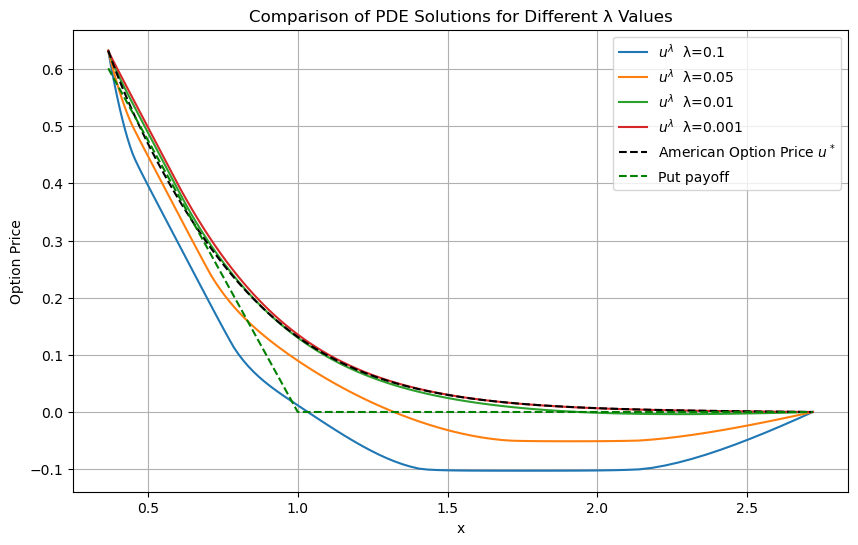

In [88]:
# Plot results
plt.figure(figsize=(10, 6))
for k, lda in enumerate(lambda_values):
    plt.plot(np.exp(x), U_values[k], label=fr'$u^λ$  λ={lda}')

# Plot American option price
plt.plot(np.exp(x), U_american_price, 'k--', label='American Option Price $u^*$')
plt.plot(np.exp(x),np.exp(-r*T)*np.maximum(K-np.exp(x),0), label = 'Put payoff', linestyle='dashed',color = 'Green')

plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of PDE Solutions for Different λ Values')
plt.legend()
plt.grid()
plt.show()

### Policy iteration algorithm

In [4]:
lambda_ = 0.001
max_iter = 2000
x,U = policy_iteration_solver(r,sigma,K,T,lambda_,Nx+1,Nt,x_min,x_max,max_iter,tol)
u_lambda = pde_solver_regularization(r,sigma,K,T,lambda_,Nx,Nt,x_min,x_max,max_iter)

Policy Iteration 1
Policy Iteration 2
Policy Iteration 3
Policy Iteration 4
Policy Iteration 5


C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Policy Iteration 6
Policy Iteration 7
Policy Iteration 8
Policy Iteration 9
Policy Iteration 10
Policy Iteration 11
Policy Iteration 12
Policy Iteration 13
Policy Iteration 14
Policy Iteration 15
Policy Iteration 16
Policy Iteration 17
Policy Iteration 18
Policy Iteration 19
Policy Iteration 20
Policy Iteration 21
Policy Iteration 22
Policy Iteration 23
Policy Iteration 24
Policy Iteration 25
Policy Iteration 26
Policy Iteration 27
Policy Iteration 28
Policy Iteration 29
Policy Iteration 30
Policy Iteration 31
Policy Iteration 32
Policy Iteration 33
Policy Iteration 34
Policy Iteration 35
Policy Iteration 36
Policy Iteration 37
Policy Iteration 38
Policy Iteration 39
Policy Iteration 40
Policy Iteration 41
Policy Iteration 42
Policy Iteration 43
Policy Iteration 44
Policy Iteration 45
Policy Iteration 46
Policy Iteration 47
Policy Iteration 48
Policy Iteration 49
Policy Iteration 50
Policy Iteration 51
Policy Iteration 52
Policy Iteration 53
Policy Iteration 54
Policy Iteration 55
Poli

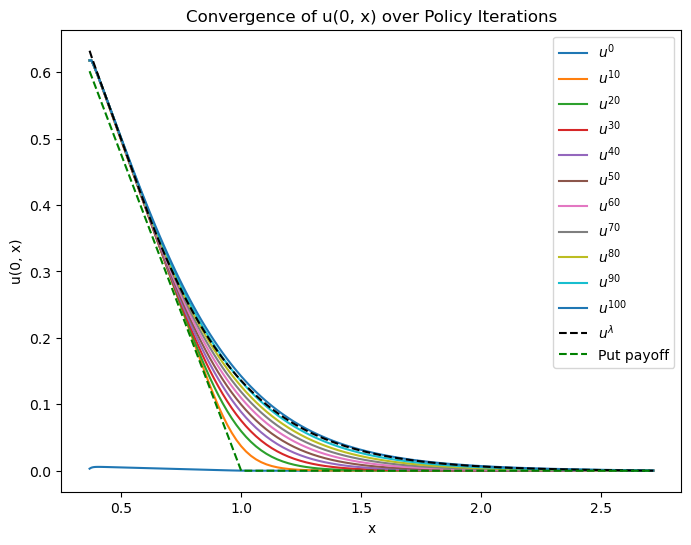

In [6]:
plt.figure(figsize=(8, 6))
for i, u_0 in enumerate(U):
    if i % 10 == 0:
        plt.plot(np.exp(x), u_0, label=fr"$u^{ {i} }$")


plt.plot(np.exp(x), u_lambda, 'k--', label='$u^{\lambda}$')
plt.plot(np.exp(x),np.exp(-r*T)*np.maximum(K-np.exp(x),0), label = 'Put payoff', linestyle='dashed',color = 'Green')
plt.legend()
plt.xlabel("x")
plt.ylabel("u(0, x)")
plt.title("Convergence of u(0, x) over Policy Iterations")
plt.show()